https://github.com/rosemaryjuarez/eds-223-week-5# Task 2

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

**UPDATE THIS LINK**
https://github.com/rosemaryjuarez/eds-223-week-5

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state name', 'county name', 'state code', 'county code', 'date', 'aqi',
       'category', 'defining parameter', 'defining site',
       'number of sites reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object')


<AxesSubplot:title={'center':'daily and 5-day average AQI in SB County'}, xlabel='date', ylabel='AQI Value'>

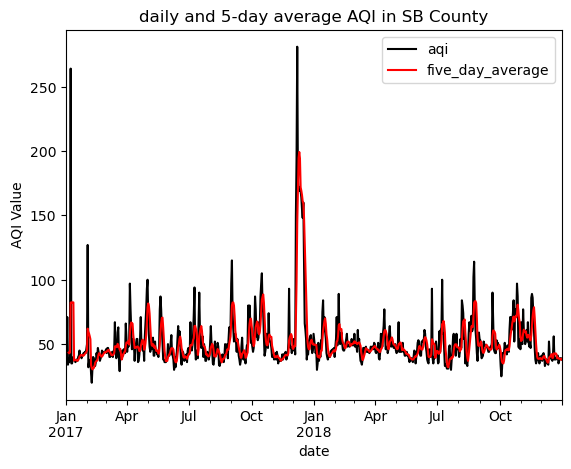

In [38]:
###importing what i need
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# reading in aqi_17
## sERVER IS TAKING MORE THAN 10 MINUTES TO LOAD IN THE ZIP THROUGH URL, SO I HAD TO IMPORT FROM DATA FOLDER INSTEAD

#url for 2017
#url_17 = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip'
aqi_17 = pd.read_csv('data/daily_aqi_by_county_2017.csv')

#reading in aqi_18

#url for aqi_18
#url_18 = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip'
aqi_18 = pd.read_csv('data/daily_aqi_by_county_2018.csv')

# (a) reading aqi for 2017
aqi_17.head()


# (b) reading aqi for 2018
aqi_18.head()

# (c) exploring the average aqi by county name
aqi_17.groupby('county Name').mean('AQI')

# (c) checking data type 
aqi_17.dtypes

# concatanating two dataframes together
aqi = pd.concat([aqi_17, aqi_18])
aqi

# initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()
print(aqi.columns, '\n')

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')
print(aqi.columns)

# as a "one liner" you could achieve this column name cleaning like this:
# aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

# selecting data from SB county using conditionals
aqi_sb = aqi[aqi.county_name == 'Santa Barbara']

#checking to see if it worked
aqi_sb.head()

#removing columns using.drop()

aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])
# checking ahain to see if it worked
aqi_sb.head()

#using dtypes to check the attributes of the column
aqi_sb.dtypes  # the date is object instead of datetime[ns]

#changing to datetime for date
aqi_sb['date'] = pd.to_datetime(aqi_sb.date)

#checking again

aqi_sb.dtypes

# checking if index is updated
aqi_sb.index
# it is not, so i will reset it
aqi_sb.reset_index(inplace = True, drop = True)
aqi_sb.head()


# adding the new column by updating it
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling(window = 5).mean()

#checking if it worked:
aqi_sb.head()

#PLOTTING TIME

#creating colors first for the lines
colors = {'aqi': 'Black',
         'five_day_average': 'red'}

#line plot of the AQI using the new column i just added
aqi_sb.plot(kind = 'line',
           x = 'date',
           y = ['aqi', 'five_day_average'],
           color = colors,
           title ='daily and 5-day average AQI in SB County',
           ylabel = 'AQI Value')

## 1

1. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 
2. Under "Donwload Data" click on "Pre-generated Data Files"
3. Click on "Tables of Daily AQI"
4. Copy the URL to the 2017 Daily AQI **by County** zip file `daily_aqi_by_county_2017.zip`
5. In the next code cell read in the data from the URL using the `pd.read_csv` function and store it as `aqi_17`. 
6. In the same cell, read in the data for the 2018 Daily AQI by County zip file and store it as `aqi_18`.

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# reading in aqi_17
## sERVER IS TAKING MORE THAN 10 MINUTES TO LOAD IN THE ZIP THROUGH URL, SO I HAD TO IMPORT FROM DATA FOLDER INSTEAD

#url for 2017
#url_17 = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip'
aqi_17 = pd.read_csv('data/daily_aqi_by_county_2017.csv')

#reading in aqi_18

#url for aqi_18
#url_18 = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip'
aqi_18 = pd.read_csv('data/daily_aqi_by_county_2018.csv')


## 2 
(a) and (b) Use the next two cells to look at the head of both data frames.

(c) Use this cell to make some other preliminary data exploration of your choosing.

In [4]:
# (a) reading aqi for 2017
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


In [4]:
# (a) reading aqi for 2017
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


In [5]:
# (b) reading aqi for 2018
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


In [6]:
# (c) exploring the average aqi by county name
aqi_17.groupby('county Name').mean('AQI')

# (c) checking data type 
aqi_17.dtypes

State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object

## 3
We currently have two separate dataframes. For this exercise we will need to "glue" them one on top of the other. The pandas function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

👀 NOTE: When we concatenate like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the index of `aqi` ends in 327536 while it has 654338 rows.


In [7]:
# concatanating two dataframes together
aqi = pd.concat([aqi_17, aqi_18])
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327532,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327533,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327534,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327535,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


## 4

Run the follwoing cell and read the comments to understand how the column names are being updated.

In [8]:
# initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()
print(aqi.columns, '\n')

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')
print(aqi.columns)

# as a "one liner" you could achieve this column name cleaning like this:
# aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state name', 'county name', 'state code', 'county code', 'date', 'aqi',
       'category', 'defining parameter', 'defining site',
       'number of sites reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object')


## 5 
In the next cell:
- Select only data from `Santa Barbara` county and store in a new variable `aqi_sb`.
- Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`. 
- Use the `dtypes` attribute to check the data types of the columns. What do you notice for the date column?

In [9]:
# selecting data from SB county using conditionals
aqi_sb = aqi[aqi.county_name == 'Santa Barbara']

#checking to see if it worked
aqi_sb.head()

#removing columns using.drop()

aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])
# checking ahain to see if it worked
aqi_sb.head()

#using dtypes to check the attributes of the column
aqi_sb.dtypes  # the date is object instead of datetime[ns]


date                         object
aqi                           int64
category                     object
defining_parameter           object
defining_site                object
number_of_sites_reporting     int64
dtype: object

## 6
In the next cell:
1. Update the date column of `aqi_sb` to be a datetime object.
2. Update the index of `aqi_sb` to be the date column.

In [10]:
#changing to datetime for date
aqi_sb['date'] = pd.to_datetime(aqi_sb.date)

#checking again

aqi_sb.dtypes

date                         datetime64[ns]
aqi                                   int64
category                             object
defining_parameter                   object
defining_site                        object
number_of_sites_reporting             int64
dtype: object

## 7
In the next cell, check that you've updated the index by accessing the index of `aqi_sb`  by running `aqi_sb.index`. Add in a comment what is the data type (dtype) of the index.

In [11]:
# checking if index is updated
aqi_sb.index
# it is not, so i will reset it
aqi_sb.reset_index(inplace = True, drop = True)
aqi_sb.head()

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
0,2017-01-01,39,Good,Ozone,06-083-4003,12
1,2017-01-02,36,Good,Ozone,06-083-4003,11
2,2017-01-03,71,Moderate,PM10,06-083-4003,12
3,2017-01-04,34,Good,Ozone,06-083-4003,13
4,2017-01-05,37,Good,Ozone,06-083-4003,12


## 8
Run the next cell and read through the comments. They will explain how to calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html).




In [21]:
# rolling() is a method for pandas.series that provides rolling window calculations
# the parameter '5D' indicates we want the window to be 5 days
# This is a lazy method (think groupby), we need to specify what we want to calculate over each window
# here we add the aggregator function mean()
# this indicates we want the mean over each window
# and we get a pd.Series as ouput
aqi_sb.aqi.rolling(window = 5).mean()


0       NaN
1       NaN
2       NaN
3       NaN
4      43.4
       ... 
725    38.6
726    38.6
727    38.2
728    37.8
729    38.4
Name: aqi, Length: 730, dtype: float64

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named 'five_day_average' to the `aqi_sb` dataframe. 

In [23]:
# adding the new column by updating it
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling(window = 5).mean()

#checking if it worked:
aqi_sb.head()

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
0,2017-01-01,39,Good,Ozone,06-083-4003,12,NaN
1,2017-01-02,36,Good,Ozone,06-083-4003,11,NaN
2,2017-01-03,71,Moderate,PM10,06-083-4003,12,NaN
3,2017-01-04,34,Good,Ozone,06-083-4003,13,NaN
4,2017-01-05,37,Good,Ozone,06-083-4003,12,43.4


## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Update the title and colors of the graph. Can you see the AQI going up during the Thomas Fire in December 2017?

<AxesSubplot:title={'center':'daily and 5-day average AQI in SB County'}, xlabel='date', ylabel='AQI Value'>

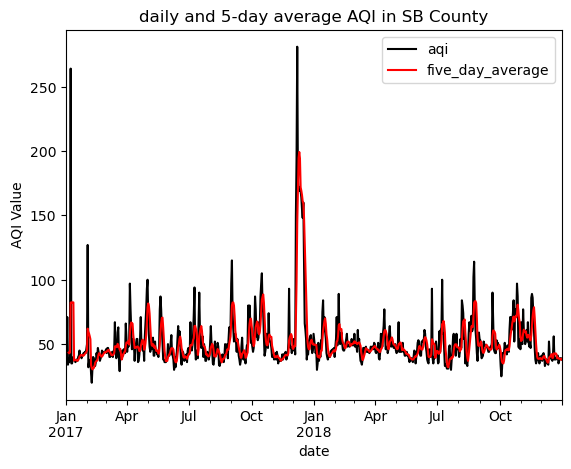

In [37]:
#creating colors first for the lines
colors = {'aqi': 'Black',
         'five_day_average': 'red'}

#line plot of the AQI using the new column i just added
aqi_sb.plot(kind = 'line',
           x = 'date',
           y = ['aqi', 'five_day_average'],
           color = colors,
           title ='daily and 5-day average AQI in SB County',
           ylabel = 'AQI Value')

## 11

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.